<font size="2">src: [Machine Learning Tutorial Python](https://www.youtube.com/watch?v=gmvvaobm7eQ) by Dhaval Patel</font>
---
---

## Requirements
---
---

In [349]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

## Linear Regression
---
---
Predicting a continous value based on a single input value
- Utilises a linear function: $ y = m*x + b $
    - `y = target value`
    - `m = slope `
    - `x = argument` 
    - `b = interception with y-axis`

In [350]:
path = os.path.join("data", "linear_regression_data.csv")
# loading the data
df = pd.read_csv(path)
# display the numeric data
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


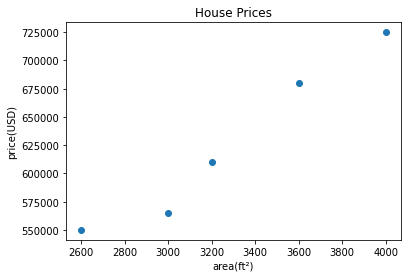

In [351]:
# explore data visually
# %matplotlib inline
plt.xlabel("area(ft²)")
plt.ylabel("price(USD)")
plt.title("House Prices")
plt.scatter(df.area, df.price)

In [352]:
# initializing the model
model = LinearRegression()
# pass data and train the mode, NOTE: first argument is expected to be a column vector, hence the different approaches to value retrieval, 
# the "values" method omits the header of the dataframe
model.fit(df[["area"]].values, df.price)
# use model to predict price (y) for a list of arguments (area (X))
X = np.array([[1000], [2000], [9001]])
model.predict(X)

array([ 316404.10958904,  452191.78082192, 1402841.26712329])

y = f(x)
y = m * x + b 
y = 135.78767123287673 * x + 180616.43835616432


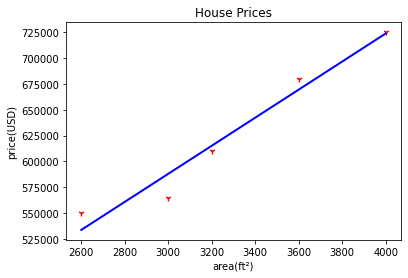

In [353]:
# display function graph (y = m*x + b) with the minimal distance to all samples, 
print("y = f(x)")
print("y = m * x + b", "\ny =", model.coef_[0], "* x +", model.intercept_)
plt.xlabel("area(ft²)")
plt.ylabel("price(USD)")
plt.title("House Prices")
plt.scatter(df.area, df.price, color = "red", marker = "1")
plt.plot(df.area, model.predict(df[["area"]].values), color = "blue", linewidth = 2)

## Multivariable Linear Regression
---
---
Predicting a continous value based on multiple input values
- Utilises a function of this shape: $ y = m1*x1 + m2*x2 + m3*x3 + ... + b $
    - `y = target value`
    - `m = factors`
    - `x = arguments` 
    - `b = interception with y-axis`

In [354]:
path = os.path.join("data", "multivariate_regression_data.csv")
# loading the data
df = pd.read_csv(path)
# display the numeric data
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,596000
4,4000,5.0,8,760000


In [355]:
# handling NaN by averaging present values
df.bedrooms = df.bedrooms.fillna(df.bedrooms.median())
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,3.5,18,610000
3,3600,3.0,30,596000
4,4000,5.0,8,760000


In [356]:
# initializing the model
model = LinearRegression()
# passing the independent variables (factors of m1, m2, m3) to the model and start training 
# price (dependent variable) = m1*area + m2*bedrooms + m3*age + b
# b = interception with y-axis 
model.fit(df[["area", "bedrooms", "age"]].values, df.price)

LinearRegression()

In [357]:
# displaying m1, m2, m3 and interception with y-axis
print(model.coef_, model.intercept_)

[    198.56145032 -116060.587035    -14172.18646994] 652276.4087270447


In [358]:
# use model to predict price (y) for an array of arguments
area = 3000
bedrooms = 3
age = 40
features = np.array([[area, bedrooms, age]])
int(model.predict(features)[0])

332891

## Logistic Regression
---
---
Used for binary classification

- Utilises the logit function (aka sigmoid function): $ y = \frac{1}{1 + e^{-x}} $
    - `y = target value`
    - `e = Euler's number (2.71828...) -> base of natural logarithm`
    - `x = arguments` 
- Passes linear function into sigmoid function: $y = \frac{1}{1 + e^{-(m*x + b)}} $

In [359]:
path = os.path.join("data", "logistic_regression_data.csv")
# loading the data
df = pd.read_csv(path)
# display some of the numeric data
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


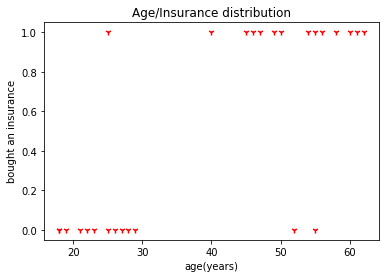

In [360]:
# explore data visually
plt.xlabel("age(years)")
plt.ylabel("bought an insurance")
plt.title("Age/Insurance distribution")
plt.scatter(df.age, df.bought_insurance, marker="1", color= "red")

In [361]:
# splitting Data into Training and test sets
X_train, X_test, y_train, y_test = train_test_split(df[['age']], df.bought_insurance, train_size = 0.9)

In [362]:
# initializing the model
model = LogisticRegression()
# pass data and train the model
model.fit(X_train, y_train)
# get prediction accuracy
model.score(X_test, y_test)

0.6666666666666666

In [363]:
# shape = Customer-ID, age
print("Customer data yet unpredicted:\n", X_test, "\n")
# predict values for unknown data
print("Prediction:", model.predict(X_test), "\n")
# display probability for predicted value
print("Probability for given predictions:\n", model.predict_proba(X_test))

Customer data yet unpredicted:
     age
19   18
17   58
6    55 

Prediction: [0 1 1] 

Probability for given predictions:
 [[0.95881066 0.04118934]
 [0.02516528 0.97483472]
 [0.04123024 0.95876976]]


C:\Users\pompom\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


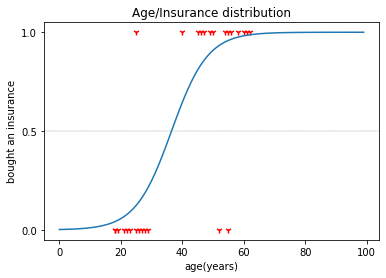

In [364]:
# Display the models internal sigmoid function together with data points
plt.yticks([0.0, 0.5, 1.0])  
plt.axhline(y=0.5, color='grey', linestyle='--', lw = 0.4)
plt.xlabel("age(years)")
plt.ylabel("bought an insurance")
plt.title("Age/Insurance distribution")
plt.scatter(df.age, df.bought_insurance, marker="1", color= "red")
plt.plot(
    # x values
    np.arange(0, 100, 1), 
    # using the models prediction on every age from 0 to 100 to plot the internal sigmoid function
    [y[1] for y in model.predict_proba(np.arange(0,100,1).reshape(100,1))]
    )

## Logistic Regression
---
---
Used for multiclass classification (handwritten digits in this case)

In [365]:
# load data (1797 samples, representing handwritten digits of 8x8 pixel as arrays of size 64)
digits = load_digits()
# get some info about the data format 
print(dir(digits))
print(type(digits))
# print first array
print(digits.data[0])

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']
<class 'sklearn.utils.Bunch'>
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


array([0, 1, 2])

<Figure size 432x288 with 0 Axes>

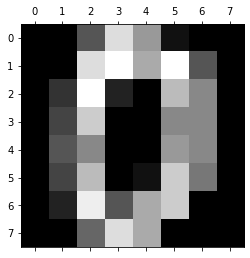

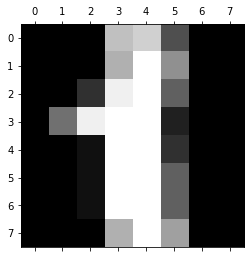

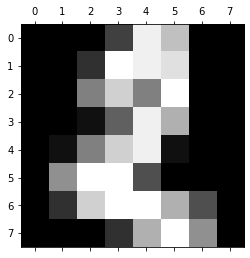

In [366]:
# display some digits
plt.gray()
for i in range(3):
    plt.matshow(digits.images[i])
# print corresponding labels
digits.target[:3]    

In [367]:
# splitting data into Training and Test sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, train_size = 0.8)

In [342]:
# initializing the model, to fix warning about convergence increase number of iterations (default is max_iter = 100)
model = LogisticRegression(max_iter=3100)
# pass data and train the model
model.fit(X_train, y_train)
# make a prediction on test set
predictions = model.predict(X_test)
print((predictions == y_test).sum(), "/", len(y_test), "samples correctly predicted")

346 / 360 samples correctly predicted


Text(69.0, 0.5, 'Truth')

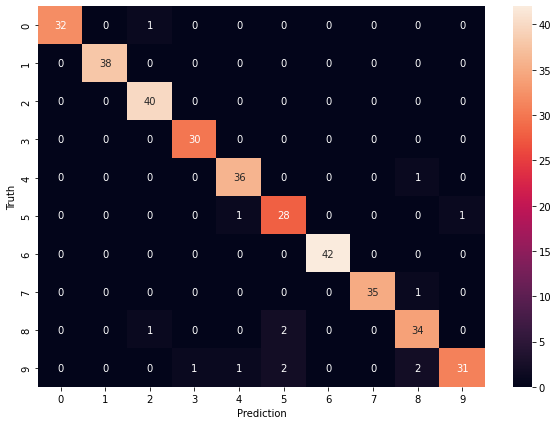

In [343]:
# print confusion matrix
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)
plt.xlabel("Prediction")
plt.ylabel("Truth")

## Decision Tree
---
---
Used for classification

- Gains information by splitting data into mutual exclusive subsets based on feature (low entropy within a subset = high information gain)

In [344]:
path = os.path.join("data", "titanic.csv")
# loading the data
df = pd.read_csv(path)
# display some of the numeric data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [345]:
# discard unneeded data by creating a new dataframe
input_data = df.drop([
    "PassengerId", 
    "Name", 
    "Ticket", 
    "SibSp",
    "Parch",
    "Cabin",
    "Embarked"
    ], axis = "columns")
input_data.head(10)

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
5,0,3,male,NaN,8.4583
6,0,1,male,54.0,51.8625
7,0,3,male,2.0,21.0750
8,1,3,female,27.0,11.1333
9,1,2,female,14.0,30.0708


In [346]:
# cleaning the data of NaN
print(input_data[input_data["Age"].isna()].shape[0], "entries in this dataframe contained NaN, now replaced with age average")
input_data = input_data.fillna(input_data.Age.median())

177 entries in this dataframe contained NaN, now replaced with age average


In [347]:
# encode nominal features into numeric values
sex_encoder = LabelEncoder()
input_data["Sex"] = sex_encoder.fit_transform(input_data["Sex"])
# separating data and targets
targets, features = np.split(input_data, [1], axis = 1)
# converting targets from float into integer to avoid "Unknown label type: 'continuous-multioutput'" error
targets = targets.astype(int)

In [348]:
# splitting data into Training and Test sets
X_train, X_test, y_train, y_test = train_test_split(features, targets, train_size = 0.8)

In [368]:
# initializing the model
model = tree.DecisionTreeClassifier()
# pass data and train the model
model.fit(X_train, y_train)
# get prediction accuracy
model.score(X_test, y_test)

0.8555555555555555